In [1]:
# 1

########## 22 April 2021 ##########
######### Alec Hirschauer #########
#
# In this notebook, we will be creating the LAMPTAB file(s)
# for the G130M 1291, 1300, 1309, 1318, and 1321 cenwaves at LP5,
# plus the G140L 800 cenwave at LP3.
#


In [2]:
# 2

# The first thing we need to do is import the relevant packages.

import calcos
from astropy.io import fits
import glob
import numpy as np

# Obviously we'll need CalCOS to process the COS data, but also
# astropy's fits to handle the .fits files, glob (which allows for
# manipulating data with similar file names), and numpy to do some
# sorting of the data based on .fits file header information.


In [3]:
# 3

# In my directory with all my data, I want to specify only some files
# to work on, from the vast assortment of files (I downloaded both the
# raw files and the processed files; clearly all we really need here are
# the unprocessed, raw files).
#
# Set a variable called "rawtags" with glob to specify only the files in
# this working directory that have the word "rawtag" in it:

rawtags = glob.glob('*_rawtag_*.fits')


In [4]:
# 4

# From here, we can print out a list of the files set by the command above,

#print(rawtags)

# or print out the whole header of the first file (index[0]),

#fits.getheader(rawtags[0])

# but the next *useful* thing to do is set a consistent 'RANDSEED' value
# for every rawtag file, which will be used for important things later on.

for myfile in rawtags:
    fits.setval(myfile, 'RANDSEED', value=123456789)
    
# This dinky for loop takes all the files defined by "rawtags", then uses
# the astropy fits package to set a value for 'RANDSEED' to the very creative
# value of 123456789.
#
# (Note: "myfile" in this case specifies the very last file set by "rawtags".)


In [5]:
# 5

# We can print out the 'RANDSEED' value to show that the last command did its job,

#fits.getval(myfile, 'RANDSEED')

# but that's only if you really need to prove it to yourself.

# What we need to do now, as stipulated in the ISRs for similar work done, is to
# set the various fits header parameters to what they need to be for when we run
# them through CalCOS, in order for them to run the way we want them to.

for myfile in rawtags:
    if fits.getval(myfile, 'OPT_ELEM') == 'G140L':
        fits.setval(myfile, 'FLATCORR', value='PERFORM')
        fits.setval(myfile, 'WAVECORR', value='OMIT')
        fits.setval(myfile, 'TRCECORR', value='OMIT')
        fits.setval(myfile, 'ALGNCORR', value='OMIT')
        fits.setval(myfile, 'XTRCTALG', value='BOXCAR')
        fits.setval(myfile, 'X1DCORR', value='PERFORM')
        fits.setval(myfile, 'BACKCORR', value='OMIT')
        fits.setval(myfile, 'FLUXCORR', value='OMIT')
        fits.setval(myfile, 'HELCORR', value='OMIT')
        fits.setval(myfile, 'GEOCORR', value='PERFORM')
        fits.setval(myfile, 'YWLKCORR', value='PERFORM')
        fits.setval(myfile, 'TEMPCORR', value='PERFORM')
        fits.setval(myfile, 'IGEOCORR', value='PERFORM')
        fits.setval(myfile, 'XTRACTAB', value='/grp/hst/cos2/LP5_ERA/files_to_use/lp3_1dx.fits')
        fits.setval(myfile, "LIFE_ADJ", value=3)
    elif fits.getval(myfile, 'OPT_ELEM') == 'G130M':
        fits.setval(myfile, 'FLATCORR', value='PERFORM')
        fits.setval(myfile, 'WAVECORR', value='OMIT')
        fits.setval(myfile, 'TRCECORR', value='OMIT')
        fits.setval(myfile, 'ALGNCORR', value='OMIT')
        fits.setval(myfile, 'XTRCTALG', value='BOXCAR')
        fits.setval(myfile, 'X1DCORR', value='PERFORM')
        fits.setval(myfile, 'BACKCORR', value='OMIT')
        fits.setval(myfile, 'FLUXCORR', value='OMIT')
        fits.setval(myfile, 'HELCORR', value='OMIT')
        fits.setval(myfile, 'GEOCORR', value='PERFORM')
        fits.setval(myfile, 'YWLKCORR', value='PERFORM')
        fits.setval(myfile, 'TEMPCORR', value='PERFORM')
        fits.setval(myfile, 'IGEOCORR', value='PERFORM')
        fits.setval(myfile, 'XTRACTAB', value='/grp/hst/cos2/LP5_ERA/files_to_use/lp5_1dx.fits')
        fits.setval(myfile, 'FLATFILE', value='/grp/hst/cos2/LP5_ERA/files_to_use/gw_imposter_flat.fits')
        fits.setval(myfile, "LIFE_ADJ", value=5)
        
# Confirm that these parameters are set properly before proceeding!
#
# We are running this all first for the G140L/800 data.


In [6]:
# 6

# Next we need to specify the special lamp flash parameters to match what the
# observations are doing in the APT file, whereby the lamp is on for 30 seconds,
# then off for a while (how long and how many times depends on the exposure),
# so that it builds up signal without getting too hot, which could damage it.
#
# For the science exposures of G130M, the exposure times are 210 seconds, with
# 120 seconds of total lamp on time (four flashes), while for the science exposures
# of G140L, the exposure times are 450 seconds, with 240 seconds of total lamp
# time (eight flashes).
#
# Also note that, for the beginning of each Visit, there's a single long exposure
# to settle the OSM, which is 1440 seconds for the two G130M Visits, but 1800 seconds
# for the single G140L Visit.
#
# We'll set this with a large "if" statement written be Elaine, which sets parameters
# like lamp duration (LMPDUR1), the start time of a flash (LMP_ON1), the end time of
# a flash (LMPOFF1), and the median time of that flash (LMPMED1).
#
# For each kind of exposure, we define this for two flashes, then note the number of
# flashes (NUMFLASH), and how to continue the pattern (set TAGFLASH to 'UNIFORMLY SPACED').
#
# Finally, note at what extension each of these parameters should be set to.

for myfile in rawtags:
    if fits.getval(myfile, 'OPT_ELEM') == 'G130M' and fits.getval(myfile, 'EXPTIME', ext=1) < 220.:
        LMPDUR1 = 30.0
        LMP_ON1 = 0.0
        LMPOFF1 = 30.0
        LMPMED1 = 15.00000
        LMPDUR2 = 30.0
        LMP_ON2 = 60.0
        LMPOFF2 = 90.0
        LMPMED2 = 75.00000
        fits.setval(myfile, 'LMPDUR1', value=LMPDUR1, ext=1)
        fits.setval(myfile, 'LMP_ON1', value=LMP_ON1, ext=1)
        fits.setval(myfile, 'LMPOFF1', value=LMPOFF1, ext=1)
        fits.setval(myfile, 'LMPMED1', value=LMPMED1, ext=1)
        fits.setval(myfile, 'LMPDUR2', value=LMPDUR2, ext=1)
        fits.setval(myfile, 'LMP_ON2', value=LMP_ON2, ext=1)
        fits.setval(myfile, 'LMPOFF2', value=LMPOFF2, ext=1)
        fits.setval(myfile, 'LMPMED2', value=LMPMED2, ext=1)
        fits.setval(myfile, 'NUMFLASH', value=4, ext=1)
        fits.setval(myfile, 'TAGFLASH', value='UNIFORMLY SPACED', ext=0)
    elif fits.getval(myfile, 'OPT_ELEM') == 'G130M' and fits.getval(myfile, 'EXPTIME', ext=1) > 220.:
        LMPDUR1 = 30.0
        LMP_ON1 = 0.0
        LMPOFF1 = 30.0
        LMPMED1 = 15.00000
        LMPDUR2 = 30.0
        LMP_ON2 = 120.0
        LMPOFF2 = 150.0
        LMPMED2 = 135.00000
        fits.setval(myfile, 'LMPDUR1', value=LMPDUR1, ext=1)
        fits.setval(myfile, 'LMP_ON1', value=LMP_ON1, ext=1)
        fits.setval(myfile, 'LMPOFF1', value=LMPOFF1, ext=1)
        fits.setval(myfile, 'LMPMED1', value=LMPMED1, ext=1)
        fits.setval(myfile, 'LMPDUR2', value=LMPDUR2, ext=1)
        fits.setval(myfile, 'LMP_ON2', value=LMP_ON2, ext=1)
        fits.setval(myfile, 'LMPOFF2', value=LMPOFF2, ext=1)
        fits.setval(myfile, 'LMPMED2', value=LMPMED2, ext=1)
        fits.setval(myfile, 'NUMFLASH', value=12, ext=1)
        fits.setval(myfile, 'TAGFLASH', value='UNIFORMLY SPACED', ext=0)
    elif fits.getval(myfile, 'OPT_ELEM') == 'G140L' and fits.getval(myfile, 'EXPTIME', ext=1) < 460.:
        LMPDUR1 = 30.0
        LMP_ON1 = 0.0
        LMPOFF1 = 30.0
        LMPMED1 = 15.00000
        LMPDUR2 = 30.0
        LMP_ON2 = 60.0
        LMPOFF2 = 90.0
        LMPMED2 = 75.00000
        fits.setval(myfile, 'LMPDUR1', value=LMPDUR1, ext=1)
        fits.setval(myfile, 'LMP_ON1', value=LMP_ON1, ext=1)
        fits.setval(myfile, 'LMPOFF1', value=LMPOFF1, ext=1)
        fits.setval(myfile, 'LMPMED1', value=LMPMED1, ext=1)
        fits.setval(myfile, 'LMPDUR2', value=LMPDUR2, ext=1)
        fits.setval(myfile, 'LMP_ON2', value=LMP_ON2, ext=1)
        fits.setval(myfile, 'LMPOFF2', value=LMPOFF2, ext=1)
        fits.setval(myfile, 'LMPMED2', value=LMPMED2, ext=1)
        fits.setval(myfile, 'NUMFLASH', value=8, ext=1)
        fits.setval(myfile, 'TAGFLASH', value='UNIFORMLY SPACED', ext=0)
    elif fits.getval(myfile, 'OPT_ELEM') == 'G140L' and fits.getval(myfile, 'EXPTIME', ext=1) > 460.:
        LMPDUR1 = 30.0
        LMP_ON1 = 0.0
        LMPOFF1 = 30.0
        LMPMED1 = 15.00000
        LMPDUR2 = 30.0
        LMP_ON2 = 120.0
        LMPOFF2 = 150.0
        LMPMED2 = 135.00000
        fits.setval(myfile, 'LMPDUR1', value=LMPDUR1, ext=1)
        fits.setval(myfile, 'LMP_ON1', value=LMP_ON1, ext=1)
        fits.setval(myfile, 'LMPOFF1', value=LMPOFF1, ext=1)
        fits.setval(myfile, 'LMPMED1', value=LMPMED1, ext=1)
        fits.setval(myfile, 'LMPDUR2', value=LMPDUR2, ext=1)
        fits.setval(myfile, 'LMP_ON2', value=LMP_ON2, ext=1)
        fits.setval(myfile, 'LMPOFF2', value=LMPOFF2, ext=1)
        fits.setval(myfile, 'LMPMED2', value=LMPMED2, ext=1)
        fits.setval(myfile, 'NUMFLASH', value=15, ext=1)
        fits.setval(myfile, 'TAGFLASH', value='UNIFORMLY SPACED', ext=0)

# It may not be the most elegant code, but it'll do the job just fine!


In [7]:
# 7

# The next step in the process is to actually run CalCOS on the data.
#
# First, to account for a weird idiosyncrasy whereby CalCOS automatically
# processes rawtag_b files after running on rawtag_a files, then crashes when
# it sees rawtag_b files that have already been processed, let's define
# a new grouping of files that are all the rawtag_a files alone:

rawtagsa = glob.glob('*_rawtag_a.fits')

# Now we can run CalCOS on our data, outputting to a new directory made
# to keep things clean (pick your own directory path):

#for myfile in rawtagsa:
#    calcos.calcos(myfile, outdir='/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_23June2021')

# Be aware that, if you're running this all locally, this step will take a decent
# amount of time (15-20 minutes, maybe).


In [8]:
# 8

# Output from CalCOS will be used to make the interim LampTab.
#
# NB, since WAVECORR is set to OMIT, the LAMP parameters from Cell #6
# aren't going to be used, but we'll need it later when we run CalCOS again
# later on.
#
# Import the python routines that Elaine sent to me:

from make_interim_lamptab import *
#from common_correlation_tasks import *
from updating_lamptab import *

# Removed the bottom two because they're already called by the first one,
# and we were getting errors like crazy (actually just the middle one).


In [9]:
# 9

lampdataLP3 = '52j2110ml_lamp.fits'
lampdataLP4 = '2bj2256ol_lamp.fits'

# ^ This is the files we're updating to make our interim files.
#
# We'll use the x1d file we made in CalCOS and pull out the array of the first flash.
#
# A .fits file, can be x1d sum or x1d singular
# difference: DQ (data quality, e.g., gain sag holes, etc.)
# sum has all FP-POS summed to it, a single exposure does not
#
# examples: wavelength column, flux column, net count rate (background subtracted)
# gross counts column, gcount (gross, but count rate), etc.
#
# This is what's put into the intensity array of the lamptab file.
# First flash so it's not blurred by drift.
# Actually we're using the x1d file, which is the combined flashes,
# which if it has any drift this will be blurred around.
# But since it's only the interim file, maybe this doesn't matter so much?
# Also note that, there shouldn't be a lot of drift since we took the
# single long exposure at the beginning of each Visit.

x1ds = glob.glob('/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_23June2021/*_x1d.fits')

# This globs all the x1ds from the output directory, but now we need to
# exclude the x1ds that were a part of the long OSM-settling exposure(s).
# Also, we want to exclude the G140L/800 exposures as well.

x1ds_G140L = []
for myfile in x1ds:
    if fits.getval(myfile, 'OPT_ELEM') == 'G140L' and fits.getval(myfile, 'EXPTIME', ext=1) < 1000.:
        x1ds_G140L.append(myfile)
        
print(len(x1ds_G140L))

# ^ This gives us four, which is the number of FP-POS for Segment A.


x1ds_G130M = []
for myfile in x1ds:
    if fits.getval(myfile, 'OPT_ELEM') == 'G130M' and fits.getval(myfile, 'EXPTIME', ext=1) < 1000.:
        x1ds_G130M.append(myfile)
        
print(len(x1ds_G130M))


4
20


In [10]:
# 10

# Make the interim lamptab...

newlamptab_G140L = '23June2021_G140L_interim_lamp.fits'

newlamptab_G130M = '23June2021_G130M_interim_lamp.fits'

# We'll use one of the functions contained within "updating_lamptab.py".

makelamptemplatefile(newlamptab_G140L, lampdataLP3, x1ds_G140L)

makelamptemplatefile(newlamptab_G130M, lampdataLP4, x1ds_G130M)

# This should write out a new file for me.
#
# The third number here isn't in the order that I would have expected,
# but glob does its thing in random order, so that's what's up.
# Also, "makelamptemplatefile" was imported from one of the routines
# that's done in Cell #8.
#
# Optical Element, Cenwave, FP offset (offset from FP-POS = 3), Exptime


G140L 800 -1 449.92
G140L 800 0 449.824
G140L 800 1 449.664
G140L 800 -2 449.76
G130M 1309 1 209.888


G130M 1327 -2 209.952
G130M 1291 -2 209.888
G130M 1309 -2 209.856
G130M 1318 -1 209.92
G130M 1300 -2 210.016
G130M 1291 1 209.952
G130M 1327 1 209.952
G130M 1318 0 209.92
G130M 1309 0 209.952
G130M 1309 -1 209.568
G130M 1291 -1 209.76
G130M 1300 -1 209.952
G130M 1291 0 209.952
G130M 1327 0 209.984
G130M 1300 0 210.016
G130M 1318 -2 209.952
G130M 1327 -1 209.888
G130M 1300 1 209.888
G130M 1318 1 209.856


800
464.0 494.0


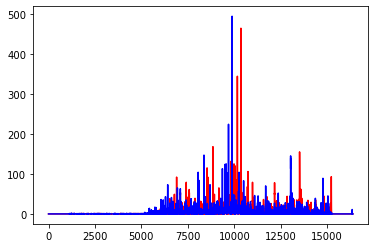

CORRELATING 0 vs -2 Shift: -477.38447850837474
saved 23June2021_G140L_interim_FP_shifts_NOdrift.txt
800 FUVB no data to shift
464.0 454.0


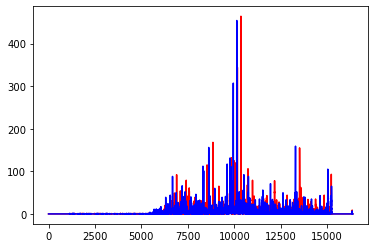

CORRELATING 0 vs -1 Shift: -221.4844407697674
saved 23June2021_G140L_interim_FP_shifts_NOdrift.txt
800 FUVB no data to shift
464.0 514.0


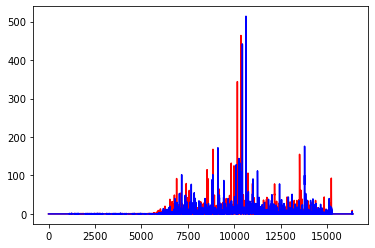

CORRELATING 0 vs 1 Shift: 269.85792206142287
saved 23June2021_G140L_interim_FP_shifts_NOdrift.txt
800 FUVB no data to shift
1055
1096
1105
1222
1230
1280
1291
1300
1309
1318
1327
1577
1589
1600
1611
1623
800
1055
1096
1105
1222
1230
1280
1291
183.0 208.0


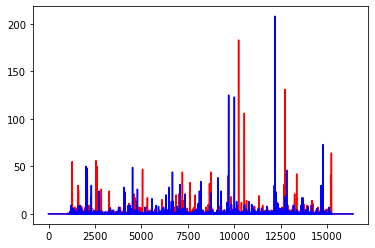

CORRELATING 0 vs -2 Shift: -536.8258418310725
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
213.0 156.0


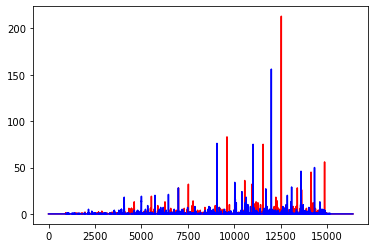

CORRELATING 0 vs -2 Shift: -537.4831309540168
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
183.0 176.0


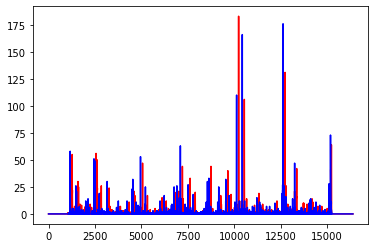

CORRELATING 0 vs -1 Shift: -108.65168652089415
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
213.0 173.0


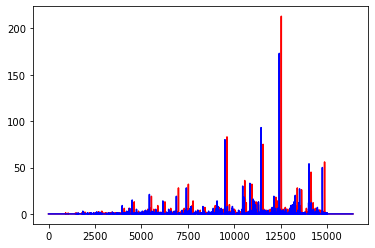

CORRELATING 0 vs -1 Shift: -108.84758858180794
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
183.0 198.0


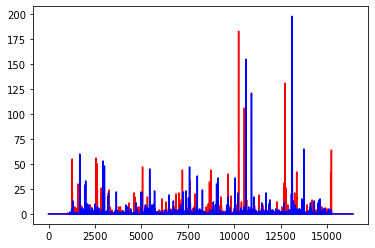

CORRELATING 0 vs 1 Shift: 385.14625783586416
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
213.0 192.0


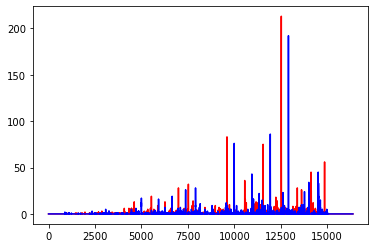

CORRELATING 0 vs 1 Shift: 385.74329674502405
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
1300
182.0 172.0


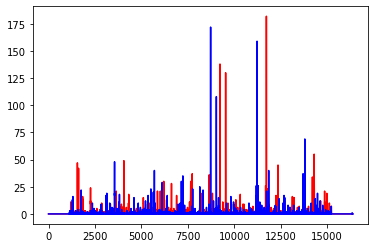

CORRELATING 0 vs -2 Shift: -503.231325354609
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
2.0 4.0


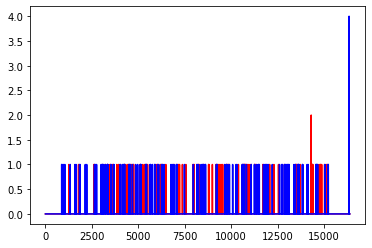

CORRELATING 0 vs -2 Shift: 2038.837280230371
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
182.0 216.0


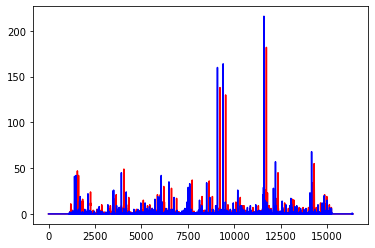

CORRELATING 0 vs -1 Shift: -135.318041744762
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
2.0 2.0


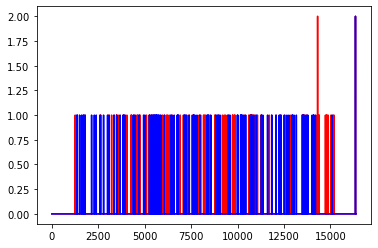

CORRELATING 0 vs -1 Shift: 0.7089891632112995
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
182.0 209.0


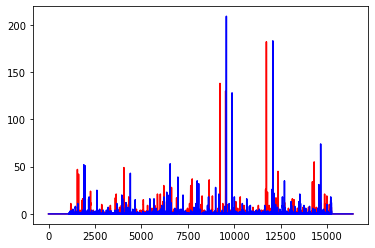

CORRELATING 0 vs 1 Shift: 345.6579718811445
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
2.0 1.0


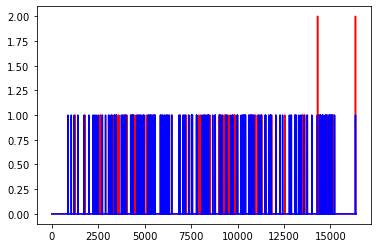

CORRELATING 0 vs 1 Shift: -6348.487240271526
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
1309
170.0 205.0


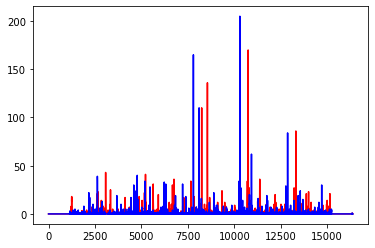

CORRELATING 0 vs -2 Shift: -445.0959223910213
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
5.0 3.0


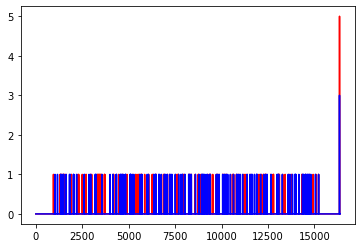

CORRELATING 0 vs -2 Shift: -1.7191139580190793
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
170.0 226.0


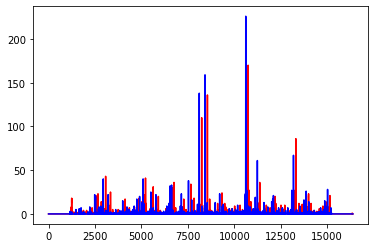

CORRELATING 0 vs -1 Shift: -128.90103250944958
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
5.0 2.0


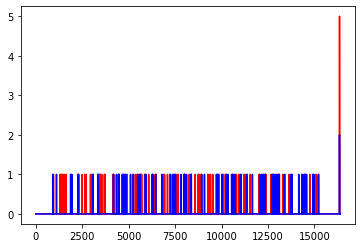

CORRELATING 0 vs -1 Shift: -1.8589496720596799
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
170.0 208.0


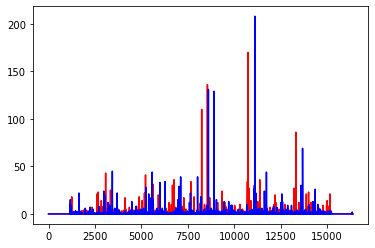

CORRELATING 0 vs 1 Shift: 360.29150228742765
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
5.0 1.0


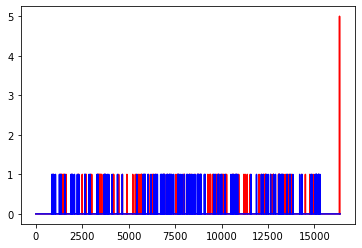

CORRELATING 0 vs 1 Shift: -10463.950359432809
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
1318
227.0 241.0


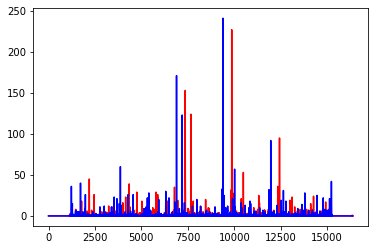

CORRELATING 0 vs -2 Shift: -469.37780460847716
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
2.0 2.0


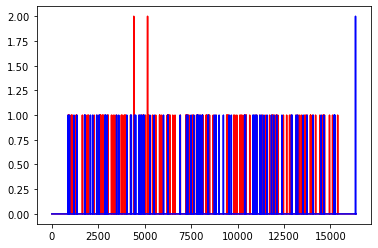

CORRELATING 0 vs -2 Shift: -2179.2466271425765
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
227.0 211.0


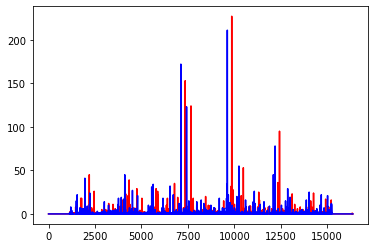

CORRELATING 0 vs -1 Shift: -237.05104576463054
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
2.0 8.0


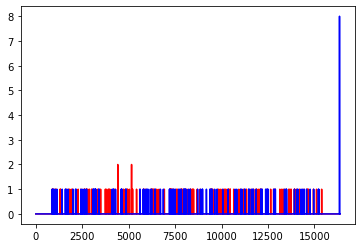

CORRELATING 0 vs -1 Shift: 11935.999836489133
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
227.0 189.0


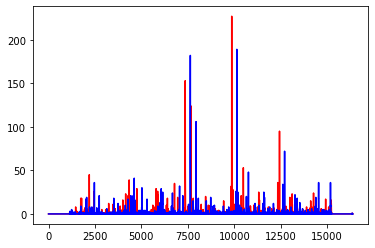

CORRELATING 0 vs 1 Shift: 273.79129603086585
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
2.0 5.0


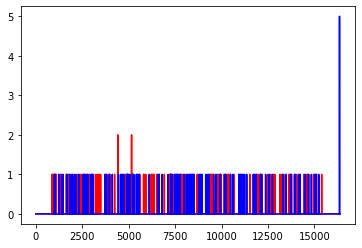

CORRELATING 0 vs 1 Shift: 11935.999777715719
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
1327
204.0 189.0


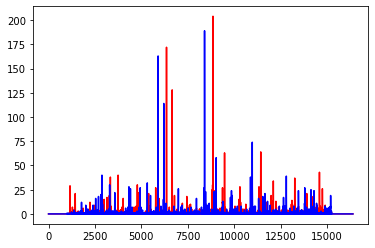

CORRELATING 0 vs -2 Shift: -453.35734868437066
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
1.0 2.0


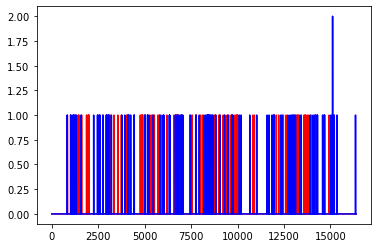

CORRELATING 0 vs -2 Shift: -415.9044978753409
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
204.0 258.0


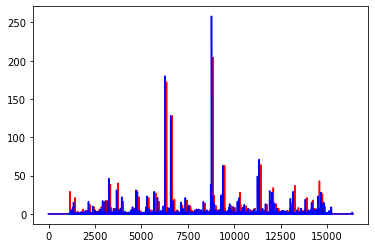

CORRELATING 0 vs -1 Shift: -80.16845421093967
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
1.0 1.0


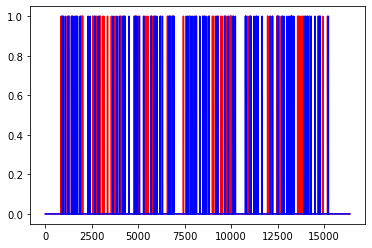

CORRELATING 0 vs -1 Shift: 494.2253193465822
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
204.0 183.0


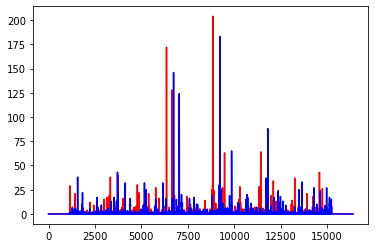

CORRELATING 0 vs 1 Shift: 381.74495862156436
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
1.0 2.0


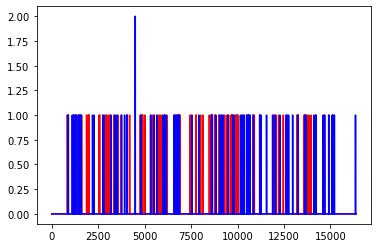

CORRELATING 0 vs 1 Shift: 1749.6748284415535
saved 23June2021_G130M_interim_FP_shifts_NOdrift.txt
1533
1577
1589
1600
1611
1623
800


800 -2 FUVA -477.38447850837474
800 -1 FUVA -221.4844407697674
800 1 FUVA 269.85792206142287
1291 -2 FUVA -536.8258418310725
1291 -2 FUVB -537.4831309540168
1291 -1 FUVA -108.65168652089415
1291 -1 FUVB -108.84758858180794
1291 1 FUVA 385.14625783586416
1291 1 FUVB 385.74329674502405
1300 -2 FUVA -503.231325354609
1300 -2 FUVB 2038.837280230371
1300 -1 FUVA -135.318041744762
1300 -1 FUVB 0.7089891632112995
1300 1 FUVA 345.6579718811445
1300 1 FUVB -6348.487240271526
1309 -2 FUVA -445.0959223910213
1309 -2 FUVB -1.7191139580190793
1309 -1 FUVA -128.90103250944958
1309 -1 FUVB -1.8589496720596799
1309 1 FUVA 360.29150228742765
1309 1 FUVB -10463.950359432809
1318 -2 FUVA -469.37780460847716
1318 -2 FUVB -2179.2466271425765
1318 -1 FUVA -237.05104576463054
1318 -1 FUVB 11935.999836489133
1318 1 FUVA 273.79129603086585
1318 1 FUVB 11935.999777715719
1327 -2 FUVA -453.35734868437066
1327 -2 FUVB -415.9044978753409
1327 -1 FUVA -80.16845421093967
1327 -1 FUVB 494.2253193465822
1327 1 FUVA 38

In [11]:
# 11

# Define a name for a .txt save file.

save_file_G140L = '23June2021_G140L_interim_FP_shifts_NOdrift.txt'
find_fp_pix_shift(newlamptab_G140L, save_file_G140L, 3)

save_file_G130M = '23June2021_G130M_interim_FP_shifts_NOdrift.txt'
find_fp_pix_shift(newlamptab_G130M, save_file_G130M, 5)

# This routine is in the "make_interim_lamptab" routine.
# Saves new pixel shifts into .txt file, then we'll update the Lamp Tab file one more time
# to update those positions.

update_lamptab(save_file_G140L, newlamptab_G140L)

update_lamptab(save_file_G130M, newlamptab_G130M)


In [12]:
# 12

# What we have above are lamp tab plots which show in red the FP-POS=3 spectrum,
# and compared with that are the blue spectra of FP-POS=1, 2, & 4.
#
# Also note the values of the pixel shifts.
#
# Now let's compare the old and the new with fits diff.

#!fitsdiff 52j2110ml_lamp.fits 23June2021_G140L_interim_lamp.fits
#!fitsdiff 2bj2256ol_lamp.fits 23June2021_G130M_interim_lamp.fits

# ^ Comment out running this check again in case I re-run the cell.

# Sanity check that the file was updated properly!


In [13]:
# 13

# Next up is to run CalCOS again!

# Changing WAVECORR to PERFORM, but everything else is the same
# from when we did this earlier.
# But also at the end, specify the new interim lamp tab file.
# Also, note that we're not changing the extract tab,
# we're using the LP3 extract tab which for cenwave 800
# has the 1105 entries.
# And we're not changing the disptab.
# Currently using LP3 disptab which has the LP4 disptab entries for c800.
#
# What is extract tab?
# has extraction region used for boxcar extraction
# rows for every grating/cenwave, segment, and aperture
# for a cenwave 800 extract tab,
# rows for all the various parameters,
# where is the spectrum landing on the detector?
# also things like slope of extraction region
# check out detector training for more details

for myfile in rawtags:
    if fits.getval(myfile, 'OPT_ELEM') == 'G140L':
        fits.setval(myfile, 'WAVECORR', value='PERFORM')
        fits.setval(myfile, 'LAMPTAB', value='23June2021_G140L_interim_lamp.fits')
    elif fits.getval(myfile, 'OPT_ELEM') == 'G130M':
        fits.setval(myfile, 'WAVECORR', value='PERFORM')
        fits.setval(myfile, 'LAMPTAB', value='23June2021_G130M_interim_lamp.fits')
        
# Because I'm setting the same set of files to calibrate, because I'm setting the
# lamptab here, it changes the default for if/when I try to run this again
# from the start.


In [14]:
# 14

# We're running CalCOS again, so let's make a new directory to put the output.
#
# And here we're just grabbing all the cenwave 800 rawtags (they're only Segment A).

rawtags_G140L = []
for myfile in rawtags:
    if fits.getval(myfile, 'OPT_ELEM') == 'G140L' and fits.getval(myfile, 'EXPTIME', ext=1) < 1000.:
        rawtags_G140L.append(myfile)
        
for myfile in rawtags_G140L:
    calcos.calcos(myfile, outdir='/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_23June2021/G140L')

# ^ Comment out running CalCOS again in case I re-run the cell, since it takes forever.

rawtags_G130M = []
for myfile in rawtags:
    if fits.getval(myfile, 'OPT_ELEM') == 'G130M' and fits.getval(myfile, 'EXPTIME', ext=1) < 1000.:
        rawtags_G130M.append(myfile)
        
for myfile in rawtags_G130M:
    calcos.calcos(myfile, outdir='/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_23June2021/G130M')

# ^ Comment out running CalCOS again in case I re-run the cell, since it takes forever.


In [15]:
# 15

# We're now looking at the python routine called
# "removedriftfromwavecorr.py"
# and Elaine is explaining what it does:
#
# First, set up where everything's going to go.

corrdir_G140L = '/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_23June2021/G140L'
outputdir_G140L = '/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_23June2021/G140L/corrtags_deshifted'
calcosout_G140L = '/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_23June2021/G140L/x1ds_deshifted'

import os
from removedriftfromwavecorr import *

lffiles = glob.glob(os.path.join(corrdir_G140L, '*lampflash.fits'))

# Copy+Paste from Camellia's code:

for lampflash in lffiles:
        
# open the lampflash file and grab the data and header
    with fits.open(lampflash) as df:
        lampdata = df[1].data
        lamphead = df[0].header

    cenwave = lamphead['cenwave']
    fppos = lamphead['fppos']

        # open the lamptab file and grab the data
        # this should be the interim lamptab file
    lamptab = '23June2021_G140L_interim_lamp.fits'#HERE
    with fits.open(lamptab) as lt:
        ltdata = lt[1].data

    for segment in ['FUVA', 'FUVB']:
        if (cenwave == 800) & (segment == 'FUVB'):
            continue

        shifts = lampdata[np.where(lampdata['segment'] == segment)]['SHIFT_DISP']

        wh_lt = np.where((ltdata['segment'] == segment) &
                         (ltdata['cenwave'] == cenwave) &
                         (ltdata['fpoffset'] == fppos-3) )
        fp_pixel_shift = ltdata[wh_lt]['fp_pixel_shift'][0]

        subshifts = shifts - fp_pixel_shift
        finalshifts = np.array([x - subshifts[0] for x in subshifts[1:]])

        print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
        print('shifts found for {} {} {} = {}'.format(cenwave, fppos, segment, finalshifts))

        # if any shifts are greater than 1 pixel, remove the drift

        # if np.any(abs(finalshifts) > 1.0):

        print('correcting xcorr....')
        info, xcorr, ycorr, time = get_corrtag_info(corrdir_G140L, lampflash, segment)

        # blocks are in the format [time_on, time_off] for a single setting from the lampflash
        blocks = make_time_blocks_sec(lampflash, info)
        print(blocks)

        newxcorr = correct_xcorr_drift(time, xcorr, blocks, finalshifts)
        newcorrtagfile = write_new_corrtag(corrdir_G140L, lampflash, newxcorr, outputdir_G140L, segment)

        # else:
        #     print('no correction done')
        #     oldcorrtagfile = get_corrtag_filename(datadir, lampflash, segment)
        #     copy_xfull(oldcorrtagfile, outputdir)

newcorrtags = glob.glob(os.path.join(outputdir_G140L, '*corrtag*'))

for newcorrtag in newcorrtags:
    fits.setval(newcorrtag, 'WAVECORR', value='OMIT')

newcorrfilesa = [x for x in newcorrtags if 'corrtag_b' not in x]

for newcorrtaga in newcorrfilesa:
    make_new_x1ds(newcorrtaga, calcosout_G140L)
                    
# (Get error below because I'm trying to re-run CalCOS on data
# that's already been CalCOSed.)


In [ ]:
# 15.5

# We're now looking at the python routine called
# "removedriftfromwavecorr.py"
# and Elaine is explaining what it does:
#
# First, set up where everything's going to go.

corrdir_G130M = '/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_23June2021/G130M'
outputdir_G130M = '/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_23June2021/G130M/corrtags_deshifted'
calcosout_G130M = '/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_23June2021/G130M/x1ds_deshifted'

import os
from removedriftfromwavecorr import *

lffiles = glob.glob(os.path.join(corrdir_G130M, '*lampflash.fits'))

# Copy+Paste from Camellia's code:

for lampflash in lffiles:
        
# open the lampflash file and grab the data and header
    with fits.open(lampflash) as df:
        lampdata = df[1].data
        lamphead = df[0].header

    cenwave = lamphead['cenwave']
    fppos = lamphead['fppos']

        # open the lamptab file and grab the data
        # this should be the interim lamptab file
    lamptab = '23June2021_G130M_interim_lamp.fits'#HERE
    with fits.open(lamptab) as lt:
        ltdata = lt[1].data

    for segment in ['FUVA', 'FUVB']:
        if (cenwave == 800) & (segment == 'FUVB'):
            continue

        shifts = lampdata[np.where(lampdata['segment'] == segment)]['SHIFT_DISP']

        wh_lt = np.where((ltdata['segment'] == segment) &
                         (ltdata['cenwave'] == cenwave) &
                         (ltdata['fpoffset'] == fppos-3) )
        fp_pixel_shift = ltdata[wh_lt]['fp_pixel_shift'][0]

        subshifts = shifts - fp_pixel_shift
        finalshifts = np.array([x - subshifts[0] for x in subshifts[1:]])

        print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
        print('shifts found for {} {} {} = {}'.format(cenwave, fppos, segment, finalshifts))

        # if any shifts are greater than 1 pixel, remove the drift

        # if np.any(abs(finalshifts) > 1.0):

        print('correcting xcorr....')
        info, xcorr, ycorr, time = get_corrtag_info(corrdir_G130M, lampflash, segment)

        # blocks are in the format [time_on, time_off] for a single setting from the lampflash
        blocks = make_time_blocks_sec(lampflash, info)
        print(blocks)

        newxcorr = correct_xcorr_drift(time, xcorr, blocks, finalshifts)
        newcorrtagfile = write_new_corrtag(corrdir_G130M, lampflash, newxcorr, outputdir_G130M, segment)

        # else:
        #     print('no correction done')
        #     oldcorrtagfile = get_corrtag_filename(datadir, lampflash, segment)
        #     copy_xfull(oldcorrtagfile, outputdir)

newcorrtags = glob.glob(os.path.join(outputdir_G130M, '*corrtag*'))

for newcorrtag in newcorrtags:
    fits.setval(newcorrtag, 'WAVECORR', value='OMIT')

newcorrfilesa = [x for x in newcorrtags if 'corrtag_b' not in x]

for newcorrtaga in newcorrfilesa:
    make_new_x1ds(newcorrtaga, calcosout_G130M)
                    
# (Get error below because I'm trying to re-run CalCOS on data
# that's already been CalCOSed.)


In [ ]:
# 16

from updating_newcenwave_lamptab import *


In [ ]:
# 17

import shutil

# First step, glob all the appropriate x1d files from the calcosout directory.
# These are the de-shifted x1d files.

x1dfiles_G140L = glob.glob(os.path.join(calcosout_G140L, '*_x1d.fits'))

# Copy+pasting relevant bits form Camellia's code...

new_lamp_name_G140L = "LP3_G140L_fuv_23June2021_lamp.fits"
#old_lamp_name = lampdataLP3
# ^ this is redundant

makelamptemplatefile(new_lamp_name_G140L, lampdataLP3, x1dfiles_G140L)

# getting x1d data (de-shifted), writing out to intensity
# column in the lamp tab

# dispersion files establish where the zero point of the
# wavelength solution (variable in DISPTAB is "D")
#
# disp file from LP4 from before worked okay,
# so let's look it up and download it like we did before
# but we need to know the file name!
#
# NOTE: we're going to use the LP3 disptab instead, but it has
# the solutions from LP4 in it (it'll be easier for me)
# "52j2117ml_disp.fits"

new_disp_name_G140L = "LP3_G140L_fuv_23June2021_disp.fits"
old_disp_name_G140L = "52j2117ml_disp.fits"

save_file_G140L = "LP3_G140L_final_FP_shifts_23June2021.txt"

find_fp_pix_shift(new_lamp_name_G140L, save_file_G140L)

# getting pixel shift value and writing it out to text file

update_lamptab(save_file_G140L, new_lamp_name_G140L)

# ^ this actually writes it out to the file
#
# Copy+Pasting now directly from Camellia's code:

# Updating DISPTAB
# copying the old disptab so the linear dispersion values match when the
# LP1 lamptab was created.

if os.path.exists(new_disp_name_G140L):
    y_n = input('Do you want to overwrite {}? y/n '.format(new_disp_name_G140L))
    if y_n == 'y':
        os.remove(new_disp_name_G140L)
        shutil.copy(old_disp_name_G140L, new_disp_name_G140L)
    else:
        raise ValueError("Exiting. Change DISPTAB name.")
else:
    shutil.copy(old_disp_name_G140L, new_disp_name_G140L)

update_zeropoint(new_lamp_name_G140L, lampdataLP3, new_disp_name_G140L, old_disp_name_G140L)


In [ ]:
# 17.5

import shutil

# First step, glob all the appropriate x1d files from the calcosout directory.
# These are the de-shifted x1d files.

x1dfiles_G130M = glob.glob(os.path.join(calcosout_G130M, '*_x1d.fits'))

# Copy+pasting relevant bits form Camellia's code...

new_lamp_name_G140L = "LP5_G130M_fuv_23June2021_lamp.fits"
#old_lamp_name = lampdataLP4
# ^ this is redundant

makelamptemplatefile(new_lamp_name_G130M, lampdataLP4, x1dfiles_G130M)

# getting x1d data (de-shifted), writing out to intensity
# column in the lamp tab

# dispersion files establish where the zero point of the
# wavelength solution (variable in DISPTAB is "D")
#
# disp file from LP4 from before worked okay,
# so let's look it up and download it like we did before
# but we need to know the file name!
#
# NOTE: we're going to use the LP3 disptab instead, but it has
# the solutions from LP4 in it (it'll be easier for me)
# "52j2117ml_disp.fits"

new_disp_name_G130M = "LP5_G130M_fuv_23June2021_disp.fits"
old_disp_name_G130M = "2bj2256ml_disp.fits"

save_file_G130M = "LP5_G130M_final_FP_shifts_23June2021.txt"

find_fp_pix_shift(new_lamp_name_G130M, save_file_G130M)

# getting pixel shift value and writing it out to text file

update_lamptab(save_file_G130M, new_lamp_name_G130M)

# ^ this actually writes it out to the file
#
# Copy+Pasting now directly from Camellia's code:

# Updating DISPTAB
# copying the old disptab so the linear dispersion values match when the
# LP1 lamptab was created.

if os.path.exists(new_disp_name_G130M):
    y_n = input('Do you want to overwrite {}? y/n '.format(new_disp_name_G130M))
    if y_n == 'y':
        os.remove(new_disp_name_G130M)
        shutil.copy(old_disp_name_G130M, new_disp_name_G130M)
    else:
        raise ValueError("Exiting. Change DISPTAB name.")
else:
    shutil.copy(old_disp_name_G130M, new_disp_name_G130M)

update_zeropoint(new_lamp_name_G130M, lampdataLP4, new_disp_name_G130M, old_disp_name_G130M)


In [ ]:
# 18

# From the above cell we have updated DISPTAB
#
# This is the end of Elaine's checklist!
# I can do a fitsdiff to see what was updated
# My deliverables will be the new _lamp.fits files
# one each for LP3 and LP5
# and also I'll send that plus the _disp.fits file(s) to Rachel at some point
#